TODO: clean this up, improve notation.

Dvotes is a vector of D voteshares, like [.4, .45, ..., .7, .8].

Below, I generate a seats-votes by adding a constant amount to Dvotes to see how many seats Democrats would win if the mean voteshare was some amount higher or lower.

## Question 1: How is the seats-votes curve related to .5 - Dvotes + mean(Dvotes)?
### Answer
Start with the blue unfilled dot, the actual outcome of this hypothetical election (the average vote was about .47). Then look at the next filled red dot. That's an election in which the following is true:

$\frac{1}{2}-v +.47 = .52$

$v = .45$

For dems to gain an extra seat, $v$ would have to be pushed up by .05, which is why this point lies $.05=\frac{1}{2}-v$ to the right of the blue unfilled dot.

The lower the D voteshare for a given election, the further to the right on the curve is the point that it represents, because you'd have to increase D voteshare by that much more to flip the seat.


## Question 2: Why is the yellow line below equivalent to the mean-median?
### Answer

The yellow line depicts the difference, in voteshare, between .5 and X, where X is the amount of voteshare that would give a 50-50 seat split. A 50-50 split happens when the median district vote is .5 (this statement is not quite accurate, there's some range of median district vote that gives a 50-50 split, also you have to think about odd numbers of districts, such as depicted here). So the amount of voteshare you would need to add to your actual mean is .5-median. 

So the right-most point is X, which is equal to MEAN + (.5 - MEDIAN). Then you subtract the left-most point, which is .5, and you have MEAN + (.5 - MEDIAN) - .5 = MEAN-MEDIAN, which is the length of the yellow line.


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


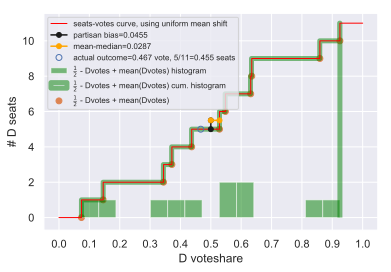

In [79]:
%load_ext autoreload
%autoreload 2

# Clone the gerrymandertests repo (https://github.com/PrincetonUniversity/gerrymandertests)
# and put this notebook in the root folder of the repo.
import sys
sys.path.append('/Users/wtadler/Repos/gerrymetrics/gerrymetrics')
import plots as gerryplots
import metrics as m

import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'svg'

np.random.seed(6)
N = 11 # number of districts

# Dvotes = sps.skewnorm.rvs(10, loc=.7, scale=.1, size=N) # skewed normal
Dvotes = np.random.rand(N) # uniform

fig, ax = gerryplots.plot_seats_votes_curve(Dvotes)


ax.hist(.5-Dvotes+np.mean(Dvotes), alpha=.5, bins=15, label='$\\frac{1}{2}$ - Dvotes + mean(Dvotes) histogram', color='green')
ax.hist(.5-Dvotes+np.mean(Dvotes), alpha=.5, bins=1000, cumulative=True, histtype='step', lw=5, color='green', label='$\\frac{1}{2}$ - Dvotes + mean(Dvotes) cum. histogram')

partisan_bias = m.partisan_bias(Dvotes)*N
ax.plot([.5, .5], [N/2, N/2-partisan_bias], 'ko-', label='partisan bias={:.3g}'.format(partisan_bias/N), markersize=5)

mean_median = np.mean(Dvotes) - np.median(Dvotes)
ax.plot([.5, .5 + mean_median], [N/2, N/2], 'o-', color='orange', label='mean-median={:.3g}'.format(mean_median), markersize=5)
ax.plot(np.mean(Dvotes), sum(Dvotes>.5), 'bo', label='actual outcome={:.3g} vote, {}/{}={:.3g} seats'.format(np.mean(Dvotes), sum(Dvotes>.5), N, sum(Dvotes>.5)/N), markerfacecolor='none', markeredgewidth=1, markeredgecolor='b')

ax.scatter(sorted(.5-Dvotes+np.mean(Dvotes)), range(N), label='$\\frac{1}{2}$ - Dvotes + mean(Dvotes)')

ax.legend(fontsize=8, loc='upper left')

# And a puzzle

As a measure of gerrymandering, we sometimes compute partisan bias, the standard form of which is shown above. But there are alternative ways to compute partisan bias besides uniform additive swing. I've coded up two alternatives but I'm not sure if it actually matters in the computation of partisan bias. Can you come up with Dvotes where these metrics will give different measures of bias? If not, why does this not matter?

In [80]:
N = 1000

Dvotes = sps.skewnorm.rvs(10, loc=.7, scale=.1, size=N) # skewed normal
# Dvotes = np.random.rand(N) # uniform

print('''
PARTISAN BIAS UNDER SOME UNIFORM SWINGS
additive:           {add:.6}
additive iterative: {add_it:.6}
proportional:       {prop:.6}
'''.format(add    = m.partisan_bias(Dvotes, swing=m._uniform_additive_swing),
           add_it = m.partisan_bias(Dvotes, swing=m._uniform_additive_iterative_swing),
           prop   = m.partisan_bias(Dvotes, swing=m._uniform_proportional_swing)))


PARTISAN BIAS UNDER SOME UNIFORM SWINGS
additive:           0.063
additive iterative: 0.063
proportional:       0.063



# Something to do
Make seats-votes curves using the alternative swing types above.